In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_nx = pd.read_csv('data/train_by_nx.csv')
test_nx = pd.read_csv('data/test_by_nx.csv')

In [3]:
train_nx.head()

,Unnamed: 0,id1,id2,link,pa,rai,aai,jc,pred_pa,pred_rai,pred_aai,pred_jc
0,0,9510123,9502114,1,72.0,0.142857,0.513898,0.058824,0,1,1,1
1,1,9707075,9604178,1,11613.0,0.226401,4.320366,0.097087,1,1,1,1
2,2,9312155,9506142,0,5.0,0.000000,0.000000,0.000000,0,0,0,0
3,3,9911255,302165,0,280.0,0.000000,0.000000,0.000000,0,0,0,0
4,4,9701033,209076,0,168.0,0.000000,0.000000,0.000000,0,0,0,0


In [4]:
test_nx.head()

,Unnamed: 0,id1,id2,pa,rai,aai,jc,pred_pa,pred_rai,pred_aai,pred_jc
0,0,9807076,9807139,1062.0,0.000000,0.000000,0.000000,1,0,0,0
1,1,109162,1182,13590.0,0.311535,5.377973,0.074303,1,1,1,1
2,2,9702187,9510135,164797.0,1.342594,15.053612,0.065338,1,1,1,1
3,3,111048,110115,3315.0,0.298419,4.899424,0.221053,1,1,1,1
4,4,9910176,9410073,1050.0,0.000000,0.000000,0.000000,1,0,0,0


In [5]:
train_nx = train_nx.iloc[:,[1,2,4,5,6,7]]
test_nx = test_nx.iloc[:,[1,2,3,4,5,6]]

In [6]:
train_nx.head()

,id1,id2,pa,rai,aai,jc
0,9510123,9502114,72.0,0.142857,0.513898,0.058824
1,9707075,9604178,11613.0,0.226401,4.320366,0.097087
2,9312155,9506142,5.0,0.000000,0.000000,0.000000
3,9911255,302165,280.0,0.000000,0.000000,0.000000
4,9701033,209076,168.0,0.000000,0.000000,0.000000


In [7]:
test_nx.head()

,id1,id2,pa,rai,aai,jc
0,9807076,9807139,1062.0,0.000000,0.000000,0.000000
1,109162,1182,13590.0,0.311535,5.377973,0.074303
2,9702187,9510135,164797.0,1.342594,15.053612,0.065338
3,111048,110115,3315.0,0.298419,4.899424,0.221053
4,9910176,9410073,1050.0,0.000000,0.000000,0.000000


In [8]:
train_nx.columns = ['id1', 'id2', 'pref_attach', 'res_allo_ind', 'ada_ada_ind', 'jaccard_nx']
test_nx.columns = ['id1', 'id2', 'pref_attach', 'res_allo_ind', 'ada_ada_ind', 'jaccard_nx']

In [9]:
train_nx.head()

,id1,id2,pref_attach,res_allo_ind,ada_ada_ind,jaccard_nx
0,9510123,9502114,72.0,0.142857,0.513898,0.058824
1,9707075,9604178,11613.0,0.226401,4.320366,0.097087
2,9312155,9506142,5.0,0.000000,0.000000,0.000000
3,9911255,302165,280.0,0.000000,0.000000,0.000000
4,9701033,209076,168.0,0.000000,0.000000,0.000000


In [10]:
test_nx.head()

,id1,id2,pref_attach,res_allo_ind,ada_ada_ind,jaccard_nx
0,9807076,9807139,1062.0,0.000000,0.000000,0.000000
1,109162,1182,13590.0,0.311535,5.377973,0.074303
2,9702187,9510135,164797.0,1.342594,15.053612,0.065338
3,111048,110115,3315.0,0.298419,4.899424,0.221053
4,9910176,9410073,1050.0,0.000000,0.000000,0.000000


In [11]:
train_ig = pd.read_csv('data/train.csv')
test_ig = pd.read_csv('data/test.csv')

In [12]:
train_ig.head()

,overlap_title,temp_diff,comm_auth,tfidf_cos_sim,reduced_tfidf_sim,comm_neighbors,jaccard_coeff,in_diff,tgt_citation,gaussian_sim,labels
0,2,0,0,0.089976,0.242161,1,0.176471,5,8,0.482725,1
1,1,1,0,0.043349,0.116740,20,0.106796,113,124,0.448604,1
2,0,-2,0,0.013141,0.067705,0,0.000000,1,2,0.525918,0
3,0,-4,0,0.014208,0.054771,0,0.000000,-2,2,0.562086,0
4,0,-5,0,0.075282,0.220903,0,0.000000,-5,2,0.578367,0


In [13]:
test_ig.head()

,overlap_title,temp_diff,comm_auth,tfidf_cos_sim,reduced_tfidf_sim,comm_neighbors,jaccard_coeff,in_diff,tgt_citation,gaussian_sim
0,0,0,0,0.078254,0.191111,0,0.000000,-46,3,1.0
1,2,1,0,0.174073,0.510321,24,0.073846,-61,39,1.0
2,1,2,0,0.138734,0.320883,59,0.065193,517,726,1.0
3,1,0,0,0.119870,0.221635,21,0.216495,5,16,0.0
4,0,5,0,0.304493,0.443364,0,0.000000,143,144,0.0


In [14]:
train_nx_ig = pd.concat([train_nx, train_ig], axis=1)
test_nx_ig = pd.concat([test_nx, test_ig], axis=1)

In [15]:
train_nx_ig.head()

,id1,id2,pref_attach,res_allo_ind,ada_ada_ind,jaccard_nx,overlap_title,temp_diff,comm_auth,tfidf_cos_sim,reduced_tfidf_sim,comm_neighbors,jaccard_coeff,in_diff,tgt_citation,gaussian_sim,labels
0,9510123,9502114,72.0,0.142857,0.513898,0.058824,2,0,0,0.089976,0.242161,1,0.176471,5,8,0.482725,1
1,9707075,9604178,11613.0,0.226401,4.320366,0.097087,1,1,0,0.043349,0.116740,20,0.106796,113,124,0.448604,1
2,9312155,9506142,5.0,0.000000,0.000000,0.000000,0,-2,0,0.013141,0.067705,0,0.000000,1,2,0.525918,0
3,9911255,302165,280.0,0.000000,0.000000,0.000000,0,-4,0,0.014208,0.054771,0,0.000000,-2,2,0.562086,0
4,9701033,209076,168.0,0.000000,0.000000,0.000000,0,-5,0,0.075282,0.220903,0,0.000000,-5,2,0.578367,0


In [16]:
test_nx_ig.head()

,id1,id2,pref_attach,res_allo_ind,ada_ada_ind,jaccard_nx,overlap_title,temp_diff,comm_auth,tfidf_cos_sim,reduced_tfidf_sim,comm_neighbors,jaccard_coeff,in_diff,tgt_citation,gaussian_sim
0,9807076,9807139,1062.0,0.000000,0.000000,0.000000,0,0,0,0.078254,0.191111,0,0.000000,-46,3,1.0
1,109162,1182,13590.0,0.311535,5.377973,0.074303,2,1,0,0.174073,0.510321,24,0.073846,-61,39,1.0
2,9702187,9510135,164797.0,1.342594,15.053612,0.065338,1,2,0,0.138734,0.320883,59,0.065193,517,726,1.0
3,111048,110115,3315.0,0.298419,4.899424,0.221053,1,0,0,0.119870,0.221635,21,0.216495,5,16,0.0
4,9910176,9410073,1050.0,0.000000,0.000000,0.000000,0,5,0,0.304493,0.443364,0,0.000000,143,144,0.0


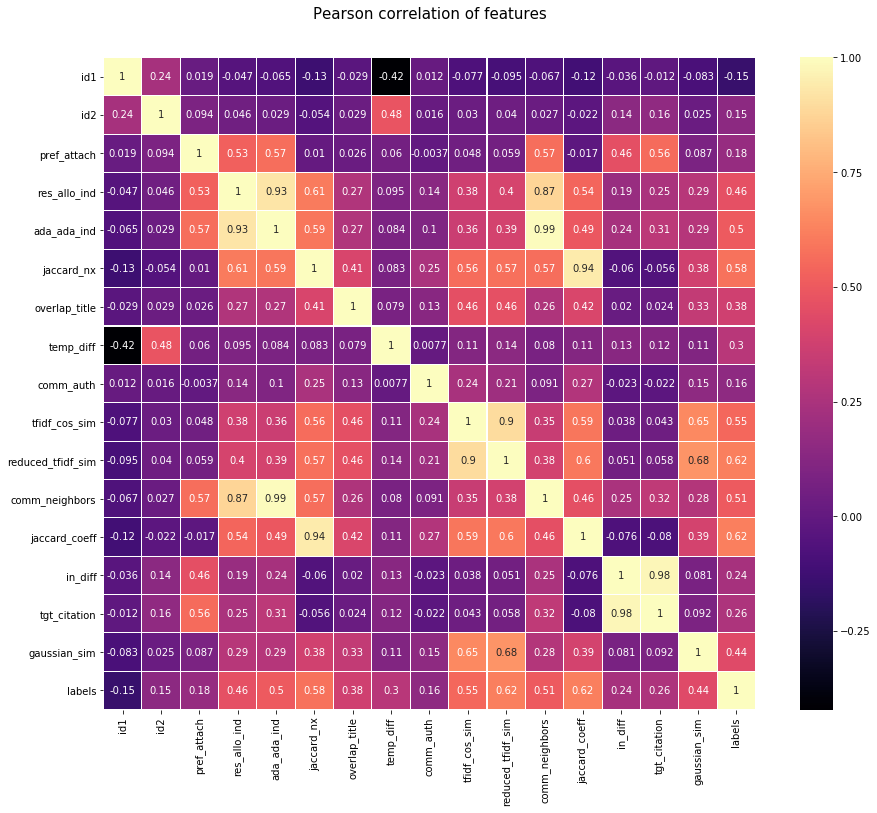

In [17]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(train_nx_ig.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

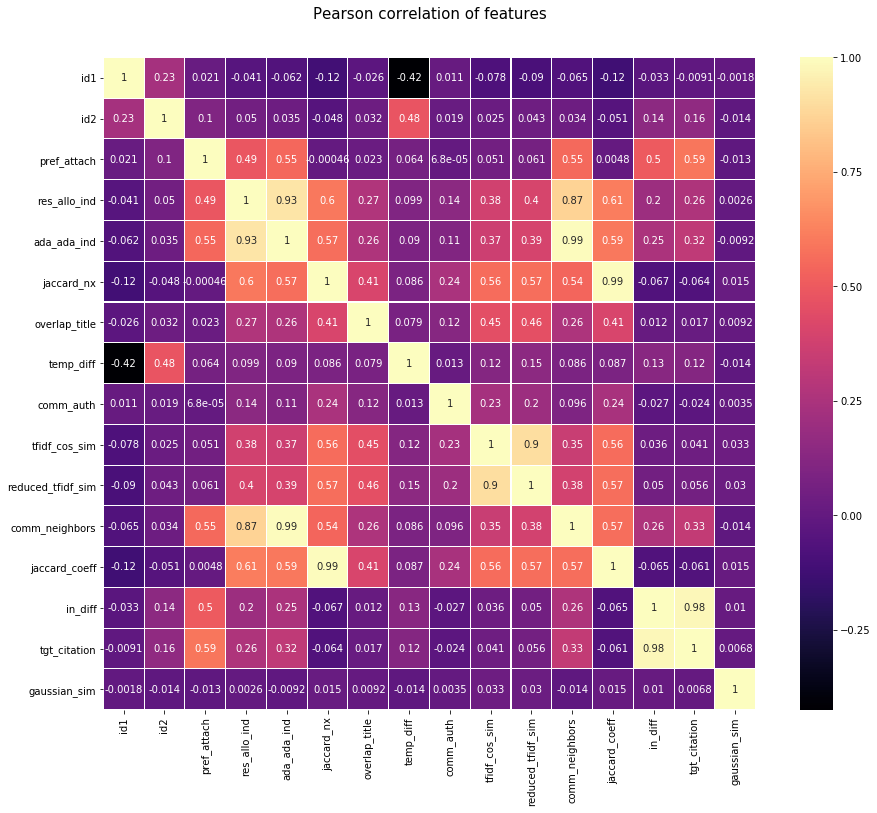

In [18]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(test_nx_ig.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

### Highly correlated features

tfidf_cos_sim VS reduced_tfidf_cos_sim 0.9: choose reduced_tfidf_cos_sim

resource_allocation_index VS adamic_adar_index VS common_neighbors >0.87 : choose one

jaccard_nx VS jaccard_ig 0.99 : choose one - jaccard_nx

target_citation VS inlink_difference 0.98 : choose target_citation

In [19]:
train_nx_ig.drop(['tfidf_cos_sim', 'jaccard_nx', 'pref_attach', 'in_diff', 'ada_ada_ind', 'comm_neighbors', 'gaussian_sim'], axis=1, inplace=True)
train_nx_ig.head()

,id1,id2,res_allo_ind,overlap_title,temp_diff,comm_auth,reduced_tfidf_sim,jaccard_coeff,tgt_citation,labels
0,9510123,9502114,0.142857,2,0,0,0.242161,0.176471,8,1
1,9707075,9604178,0.226401,1,1,0,0.116740,0.106796,124,1
2,9312155,9506142,0.000000,0,-2,0,0.067705,0.000000,2,0
3,9911255,302165,0.000000,0,-4,0,0.054771,0.000000,2,0
4,9701033,209076,0.000000,0,-5,0,0.220903,0.000000,2,0


In [20]:
test_nx_ig.drop(['tfidf_cos_sim', 'jaccard_nx', 'pref_attach', 'in_diff', 'ada_ada_ind', 'comm_neighbors', 'gaussian_sim'], axis=1, inplace=True)
test_nx_ig.head()

,id1,id2,res_allo_ind,overlap_title,temp_diff,comm_auth,reduced_tfidf_sim,jaccard_coeff,tgt_citation
0,9807076,9807139,0.000000,0,0,0,0.191111,0.000000,3
1,109162,1182,0.311535,2,1,0,0.510321,0.073846,39
2,9702187,9510135,1.342594,1,2,0,0.320883,0.065193,726
3,111048,110115,0.298419,1,0,0,0.221635,0.216495,16
4,9910176,9410073,0.000000,0,5,0,0.443364,0.000000,144


In [21]:
train_nx_ig.to_csv('data/train_nx_ig_v3.csv', index=False)
test_nx_ig.to_csv('data/test_nx_ig_v3.csv', index=False)

### new new features

In [10]:
train1 = pd.read_csv('../data/train_stacked.csv')
train1.head()

,id1,id2,link,rno1,rno2,sim,cn,aai,year1,year2,year_diff,common_authors,title_overlap,journal_overlap,centroid_sim,wmd,rf_stack,lr_stack,xgb_stack,svc_stack
0,9510123,9502114,1,16827,15446,0.088692,1,0.513898,1995,1995,0,0.0,0.285714,1.0,0.683964,1.872725,1,1,1,1
1,9707075,9604178,1,21154,18059,0.041731,20,4.320366,1997,1996,1,0.0,0.250000,0.0,0.544016,1.335541,1,1,1,1
2,9312155,9506142,0,13074,16171,0.019492,0,0.000000,1993,1995,-2,0.0,0.000000,0.0,0.761403,2.087327,0,0,0,0
3,9911255,302165,0,27486,9702,0.053197,0,0.000000,1999,2003,-4,0.0,0.000000,0.0,0.738870,1.602484,0,0,0,0
4,9701033,209076,0,19856,8212,0.079146,0,0.000000,1997,2002,-5,0.0,0.000000,0.0,0.733977,1.414463,0,0,0,0


In [11]:
train2 = pd.read_csv('../data/train_nx_ig_v2.csv')
train2.head()

,id1,id2,pref_attach,res_allo_ind,ada_ada_ind,jaccard_nx,overlap_title,temp_diff,comm_auth,tfidf_cos_sim,reduced_tfidf_sim,comm_neighbors,jaccard_coeff,in_diff,tgt_citation,gaussian_sim,labels
0,9510123,9502114,72.0,0.142857,0.513898,0.058824,2,0,0,0.089976,0.242161,1,0.176471,5,8,0.482725,1
1,9707075,9604178,11613.0,0.226401,4.320366,0.097087,1,1,0,0.043349,0.116740,20,0.106796,113,124,0.448604,1
2,9312155,9506142,5.0,0.000000,0.000000,0.000000,0,-2,0,0.013141,0.067705,0,0.000000,1,2,0.525918,0
3,9911255,302165,280.0,0.000000,0.000000,0.000000,0,-4,0,0.014208,0.054771,0,0.000000,-2,2,0.562086,0
4,9701033,209076,168.0,0.000000,0.000000,0.000000,0,-5,0,0.075282,0.220903,0,0.000000,-5,2,0.578367,0


In [12]:
X_train = pd.concat([train1.loc[:,['sim','cn','year_diff','common_authors','title_overlap','journal_overlap','centroid_sim','wmd']], train2.loc[:,['tgt_citation','jaccard_nx']]], axis=1)

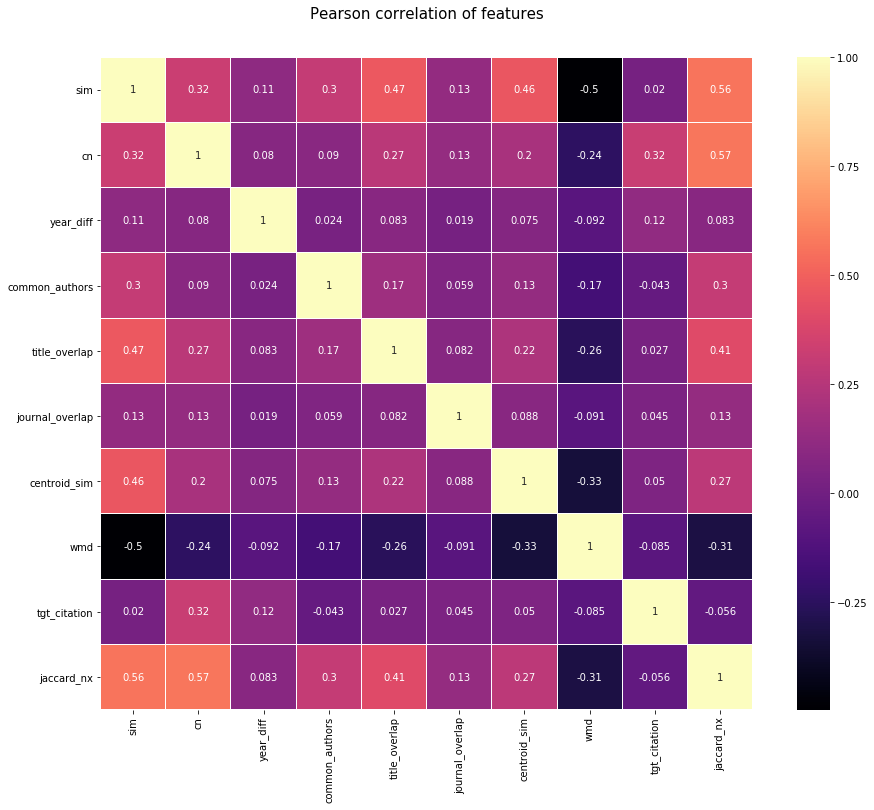

In [13]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

### replace sim by stemmed sim

In [2]:
train1 = pd.read_csv('../data/train_stacked.csv')
train1.head()

,id1,id2,link,rno1,rno2,sim,cn,aai,year1,year2,year_diff,common_authors,title_overlap,journal_overlap,centroid_sim,wmd,rf_stack,lr_stack,xgb_stack,svc_stack
0,9510123,9502114,1,16827,15446,0.064373,1,0.513898,1995,1995,0,0.0,0.285714,1.0,0.683964,1.872725,1,1,1,1
1,9707075,9604178,1,21154,18059,0.021211,20,4.320366,1997,1996,1,0.0,0.250000,0.0,0.544016,1.335541,1,1,1,1
2,9312155,9506142,0,13074,16171,0.017202,0,0.000000,1993,1995,-2,0.0,0.000000,0.0,0.761403,2.087327,0,0,0,0
3,9911255,302165,0,27486,9702,0.012634,0,0.000000,1999,2003,-4,0.0,0.000000,0.0,0.738870,1.602484,0,0,0,0
4,9701033,209076,0,19856,8212,0.059588,0,0.000000,1997,2002,-5,0.0,0.000000,0.0,0.733977,1.414463,0,0,0,0


In [3]:
train2 = pd.read_csv('../data/train_treated_stem.csv')
train2.head()

,Unnamed: 0,id1,id2,link,rno1,rno2,sim
0,0,9510123,9502114,1,16827,15446,0.088692
1,1,9707075,9604178,1,21154,18059,0.041731
2,2,9312155,9506142,0,13074,16171,0.019492
3,3,9911255,302165,0,27486,9702,0.053197
4,4,9701033,209076,0,19856,8212,0.079146


In [4]:
train1['sim'] = train2['sim']
train1.head()

,id1,id2,link,rno1,rno2,sim,cn,aai,year1,year2,year_diff,common_authors,title_overlap,journal_overlap,centroid_sim,wmd,rf_stack,lr_stack,xgb_stack,svc_stack
0,9510123,9502114,1,16827,15446,0.088692,1,0.513898,1995,1995,0,0.0,0.285714,1.0,0.683964,1.872725,1,1,1,1
1,9707075,9604178,1,21154,18059,0.041731,20,4.320366,1997,1996,1,0.0,0.250000,0.0,0.544016,1.335541,1,1,1,1
2,9312155,9506142,0,13074,16171,0.019492,0,0.000000,1993,1995,-2,0.0,0.000000,0.0,0.761403,2.087327,0,0,0,0
3,9911255,302165,0,27486,9702,0.053197,0,0.000000,1999,2003,-4,0.0,0.000000,0.0,0.738870,1.602484,0,0,0,0
4,9701033,209076,0,19856,8212,0.079146,0,0.000000,1997,2002,-5,0.0,0.000000,0.0,0.733977,1.414463,0,0,0,0


In [5]:
train1.to_csv('../data/train_stacked.csv', index=False)

In [6]:
test1 = pd.read_csv('../data/test_stacked.csv')
test1.head()

,id1,id2,rno1,rno2,sim,cn,aai,year1,year2,year_diff,common_authors,title_overlap,journal_overlap,centroid_sim,wmd,rf_stack,lr_stack,svc_stack,xgb_stack
0,9807076,9807139,23774,23835,0.071870,0,0.000000,1998,1998,0,0.0,0.000000,0.5,0.664996,1.808661,0,0,0,0
1,109162,1182,5227,172,0.163040,24,5.377973,2001,2000,1,0.0,0.444444,0.0,0.688959,1.515163,1,1,1,1
2,9702187,9510135,20185,16838,0.138004,59,15.053612,1997,1995,2,0.0,0.285714,1.0,0.566483,1.822632,1,1,1,1
3,111048,110115,5621,5397,0.101857,21,4.899424,2001,2001,0,0.0,0.153846,1.0,0.576187,1.841217,1,1,1,1
4,9910176,9410073,27159,14643,0.091231,0,0.000000,1999,1994,5,0.0,0.000000,0.0,0.428577,1.462258,0,1,1,1


In [7]:
test2 = pd.read_csv('../data/test_treated_stem.csv')
test2.head()

,Unnamed: 0,id1,id2,rno1,rno2,sim
0,0,9807076,9807139,23774,23835,0.062528
1,1,109162,1182,5227,172,0.160090
2,2,9702187,9510135,20185,16838,0.128317
3,3,111048,110115,5621,5397,0.126812
4,4,9910176,9410073,27159,14643,0.092718


In [8]:
test1['sim'] = test2['sim']
test1.head()

,id1,id2,rno1,rno2,sim,cn,aai,year1,year2,year_diff,common_authors,title_overlap,journal_overlap,centroid_sim,wmd,rf_stack,lr_stack,svc_stack,xgb_stack
0,9807076,9807139,23774,23835,0.062528,0,0.000000,1998,1998,0,0.0,0.000000,0.5,0.664996,1.808661,0,0,0,0
1,109162,1182,5227,172,0.160090,24,5.377973,2001,2000,1,0.0,0.444444,0.0,0.688959,1.515163,1,1,1,1
2,9702187,9510135,20185,16838,0.128317,59,15.053612,1997,1995,2,0.0,0.285714,1.0,0.566483,1.822632,1,1,1,1
3,111048,110115,5621,5397,0.126812,21,4.899424,2001,2001,0,0.0,0.153846,1.0,0.576187,1.841217,1,1,1,1
4,9910176,9410073,27159,14643,0.092718,0,0.000000,1999,1994,5,0.0,0.000000,0.0,0.428577,1.462258,0,1,1,1


In [9]:
test1.to_csv('../data/test_stacked.csv', index=False)

### select features

In [2]:
import pandas as pd
path = '../../project1/data/'

In [3]:
train_w2v = pd.read_csv(path + 'train_treated_with_journal_w2v.csv')
train_w2v.head()
# sim: from gensim

,id1,id2,link,rno1,rno2,sim,cn,aai,year1,year2,year_diff,common_authors,title_overlap,journal_overlap,centroid_sim,wmd
0,9510123,9502114,1,16827,15446,0.064373,1,0.513898,1995,1995,0,0.0,0.285714,1.0,0.716250,2.992504
1,9707075,9604178,1,21154,18059,0.021211,20,4.320366,1997,1996,1,0.0,0.250000,0.0,0.657709,2.335481
2,9312155,9506142,0,13074,16171,0.017202,0,0.000000,1993,1995,-2,0.0,0.000000,0.0,0.804457,2.870290
3,9911255,302165,0,27486,9702,0.012634,0,0.000000,1999,2003,-4,0.0,0.000000,0.0,0.779212,2.767666
4,9701033,209076,0,19856,8212,0.059588,0,0.000000,1997,2002,-5,0.0,0.000000,0.0,0.800134,2.670690


In [4]:
train_combined = pd.read_csv(path + 'train_combined.csv')
train_combined.head()

,id1,id2,pref_attach,res_allo_ind,ada_ada_ind,jaccard_nx,overlap_title,temp_diff,comm_auth,tfidf_cos_sim,...,tgt_citation,gaussian_sim,labels,same_journal,sim,comm_auth_s,comm_neigh_s,aai_s,title_sim,journal_sim
0,9510123,9502114,72.0,0.142857,0.513898,0.058824,2,0,0,0.089976,...,8,0.482725,1,1,0.064373,0,1,0.513898,0.365455,1.0
1,9707075,9604178,11613.0,0.226401,4.320366,0.097087,1,1,0,0.043349,...,124,0.448604,1,-1,0.021211,0,20,4.320366,-0.006062,-1.0
2,9312155,9506142,5.0,0.000000,0.000000,0.000000,0,-2,0,0.013141,...,2,0.525918,0,0,0.017202,0,0,0.000000,0.002932,0.0
3,9911255,302165,280.0,0.000000,0.000000,0.000000,0,-4,0,0.014208,...,2,0.562086,0,-1,0.012634,0,0,0.000000,-0.009145,-1.0
4,9701033,209076,168.0,0.000000,0.000000,0.000000,0,-5,0,0.075282,...,2,0.578367,0,-1,0.059588,0,0,0.000000,-0.000500,-1.0


In [5]:
train_all = train_w2v.copy()
train_all.drop(labels=['year1','year2'], axis=1, inplace=True)
train_all.rename(columns={'sim':'abs_gensim_sim','centroid_sim':'abs_centroid_sim','wmd':'abs_wmd'}, inplace=True)
train_all['pa'] = train_combined['pref_attach']
train_all['rai'] = train_combined['res_allo_ind']
train_all['jaccard_nx'] = train_combined['jaccard_nx']
train_all['abs_tfidf_sim'] = train_combined['tfidf_cos_sim']
train_all['abs_reduced_tfidf_sim'] = train_combined['reduced_tfidf_sim']
train_all['inlink_diff'] = train_combined['in_diff']
train_all['tgt_citation'] = train_combined['tgt_citation']
train_all['journal_sim'] = train_combined['journal_sim']
train_all['abs_gaussian_sim'] = train_combined['gaussian_sim']
train_all.head()

,id1,id2,link,rno1,rno2,abs_gensim_sim,cn,aai,year_diff,common_authors,...,abs_wmd,pa,rai,jaccard_nx,abs_tfidf_sim,abs_reduced_tfidf_sim,inlink_diff,tgt_citation,journal_sim,abs_gaussian_sim
0,9510123,9502114,1,16827,15446,0.064373,1,0.513898,0,0.0,...,2.992504,72.0,0.142857,0.058824,0.089976,0.242161,5,8,1.0,0.482725
1,9707075,9604178,1,21154,18059,0.021211,20,4.320366,1,0.0,...,2.335481,11613.0,0.226401,0.097087,0.043349,0.116740,113,124,-1.0,0.448604
2,9312155,9506142,0,13074,16171,0.017202,0,0.000000,-2,0.0,...,2.870290,5.0,0.000000,0.000000,0.013141,0.067705,1,2,0.0,0.525918
3,9911255,302165,0,27486,9702,0.012634,0,0.000000,-4,0.0,...,2.767666,280.0,0.000000,0.000000,0.014208,0.054771,-2,2,-1.0,0.562086
4,9701033,209076,0,19856,8212,0.059588,0,0.000000,-5,0.0,...,2.670690,168.0,0.000000,0.000000,0.075282,0.220903,-5,2,-1.0,0.578367


In [6]:
train_all = train_all.loc[:, ['id1', 'id2', 'link', 'rno1', 'rno2', 
                              'cn', 'aai', 'rai', 'pa', 'jaccard_nx', 'inlink_diff', 'tgt_citation', 
                              'year_diff', 'common_authors', 'title_overlap', 'journal_overlap', 'journal_sim', 
                              'abs_tfidf_sim', 'abs_reduced_tfidf_sim', 'abs_gensim_sim', 'abs_gaussian_sim', 'abs_centroid_sim', 'abs_wmd']]
train_all.head()

,id1,id2,link,rno1,rno2,cn,aai,rai,pa,jaccard_nx,...,common_authors,title_overlap,journal_overlap,journal_sim,abs_tfidf_sim,abs_reduced_tfidf_sim,abs_gensim_sim,abs_gaussian_sim,abs_centroid_sim,abs_wmd
0,9510123,9502114,1,16827,15446,1,0.513898,0.142857,72.0,0.058824,...,0.0,0.285714,1.0,1.0,0.089976,0.242161,0.064373,0.482725,0.716250,2.992504
1,9707075,9604178,1,21154,18059,20,4.320366,0.226401,11613.0,0.097087,...,0.0,0.250000,0.0,-1.0,0.043349,0.116740,0.021211,0.448604,0.657709,2.335481
2,9312155,9506142,0,13074,16171,0,0.000000,0.000000,5.0,0.000000,...,0.0,0.000000,0.0,0.0,0.013141,0.067705,0.017202,0.525918,0.804457,2.870290
3,9911255,302165,0,27486,9702,0,0.000000,0.000000,280.0,0.000000,...,0.0,0.000000,0.0,-1.0,0.014208,0.054771,0.012634,0.562086,0.779212,2.767666
4,9701033,209076,0,19856,8212,0,0.000000,0.000000,168.0,0.000000,...,0.0,0.000000,0.0,-1.0,0.075282,0.220903,0.059588,0.578367,0.800134,2.670690


In [7]:
train_all.to_csv(path+'train_all.csv', index=False)

In [8]:
test_w2v = pd.read_csv(path + 'test_treated_with_journal_w2v.csv')
test_combined = pd.read_csv(path + 'test_combined.csv')
test_all = test_w2v.copy()
test_all.drop(labels=['year1','year2'], axis=1, inplace=True)
test_all.rename(columns={'sim':'abs_gensim_sim','centroid_sim':'abs_centroid_sim','wmd':'abs_wmd'}, inplace=True)
test_all['pa'] = test_combined['pref_attach']
test_all['rai'] = test_combined['res_allo_ind']
test_all['jaccard_nx'] = test_combined['jaccard_nx']
test_all['abs_tfidf_sim'] = test_combined['tfidf_cos_sim']
test_all['abs_reduced_tfidf_sim'] = test_combined['reduced_tfidf_sim']
test_all['inlink_diff'] = test_combined['in_diff']
test_all['tgt_citation'] = test_combined['tgt_citation']
test_all['journal_sim'] = test_combined['journal_sim']
test_all['abs_gaussian_sim'] = test_combined['gaussian_sim']
test_all = test_all.loc[:, ['id1', 'id2', 'rno1', 'rno2', 
                            'cn', 'aai', 'rai', 'pa', 'jaccard_nx', 'inlink_diff', 'tgt_citation', 
                            'year_diff', 'common_authors', 'title_overlap', 'journal_overlap', 'journal_sim', 
                            'abs_tfidf_sim', 'abs_reduced_tfidf_sim', 'abs_gensim_sim', 'abs_gaussian_sim', 'abs_centroid_sim', 'abs_wmd']]
test_all.head()

,id1,id2,rno1,rno2,cn,aai,rai,pa,jaccard_nx,inlink_diff,...,common_authors,title_overlap,journal_overlap,journal_sim,abs_tfidf_sim,abs_reduced_tfidf_sim,abs_gensim_sim,abs_gaussian_sim,abs_centroid_sim,abs_wmd
0,9807076,9807139,23774,23835,0,0.000000,0.000000,1062.0,0.000000,-46,...,0.0,0.000000,0.5,0.500000,0.078254,0.191111,0.071870,0.524631,0.744686,2.544625
1,109162,1182,5227,172,24,5.377973,0.311535,13590.0,0.074303,-61,...,0.0,0.444444,0.0,-1.000000,0.174073,0.510321,0.163040,0.517831,0.742522,2.517749
2,9702187,9510135,20185,16838,59,15.053612,1.342594,164797.0,0.065338,517,...,0.0,0.285714,1.0,1.000000,0.138734,0.320883,0.138004,0.555029,0.773785,2.528663
3,111048,110115,5621,5397,21,4.899424,0.298419,3315.0,0.221053,5,...,0.0,0.153846,1.0,1.000000,0.119870,0.221635,0.101857,0.547067,0.754036,2.519363
4,9910176,9410073,27159,14643,0,0.000000,0.000000,1050.0,0.000000,143,...,0.0,0.000000,0.0,0.142857,0.304493,0.443364,0.091231,0.522914,0.702717,2.408418


In [9]:
test_all.to_csv(path+'test_all.csv', index=False)

### pca and scaling

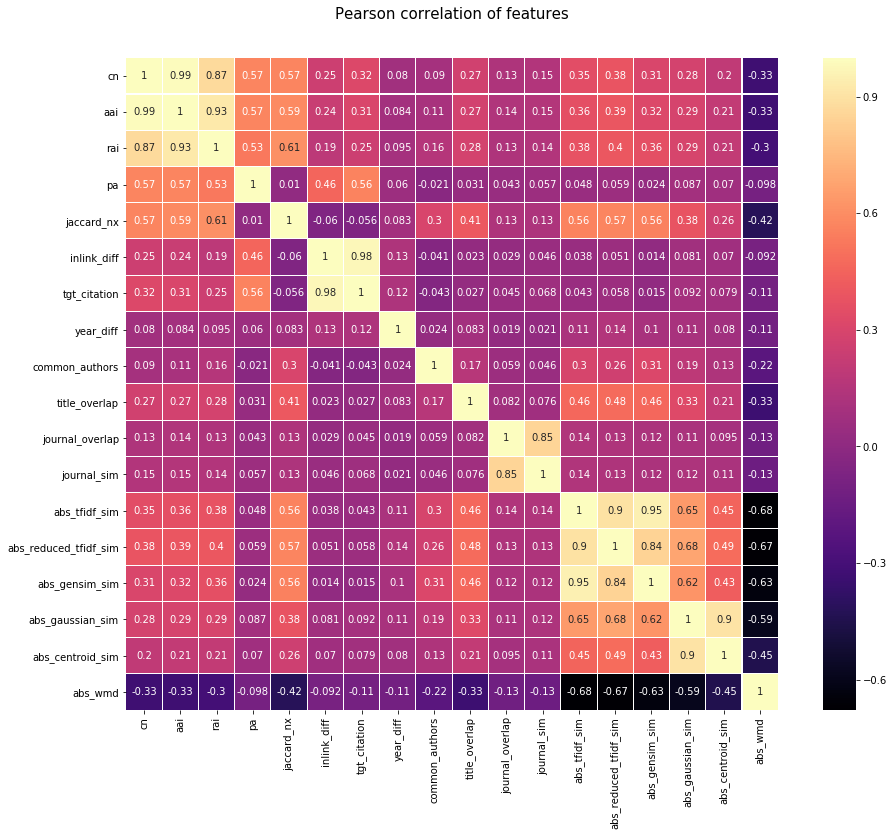

In [2]:
path = '../../project1/data/'
train_all = pd.read_csv(path+'train_all.csv')
X_train = train_all.drop(['id1', 'id2', 'link', 'rno1', 'rno2'], axis=1)
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(X_train.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

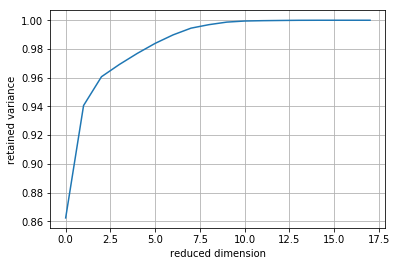

In [3]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

import tensorflow as tf
sess = tf.Session()
s, u, v = tf.svd(X_train)
s = s.eval(session=sess)
v = v.eval(session=sess)
s = s ** 2
s_cum = s.cumsum()
s_cum /= s_cum[-1]

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(s_cum)
plt.xlabel('reduced dimension')
plt.ylabel('retained variance')
plt.grid(True)
plt.show()

In [4]:
dim_r = 0
while s_cum[dim_r] < 0.99:
    dim_r += 1
dim_r += 1
dim_r

8

In [5]:
trans_matrix = v[:, :dim_r]
np.savetxt('../trans_matrix.txt', trans_matrix)
trans_matrix.shape

(18, 8)

In [6]:
X_train = X_train.dot(trans_matrix)
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7
0,1.774734,0.842050,-0.028520,0.009977,-0.078081,-0.147951,-0.153486,0.030230
1,1.172804,-0.441584,-0.067471,0.083092,-0.065442,-0.094083,-0.134513,-0.050566
2,1.383787,-0.150143,0.174463,-0.194856,-0.035852,0.209134,-0.014177,0.038341
3,1.187253,-0.456200,0.126047,-0.217469,0.023154,-0.134698,0.005997,0.000246
4,1.209250,-0.455561,0.005678,-0.269277,-0.003080,-0.141795,0.090299,-0.003051


In [7]:
from sklearn.externals import joblib
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train = scaler2.transform(X_train)
joblib.dump(scaler, '../scaler.save')
joblib.dump(scaler2, '../scaler2.save')
train_all_treated = pd.DataFrame(X_train)
train_all_treated['link'] = train_all['link']
train_all_treated.to_csv(path+'train_all_treated.csv', index=False)

In [8]:
test_all = pd.read_csv(path+'test_all.csv')
X_test = test_all.drop(['id1', 'id2', 'rno1', 'rno2'], axis=1)
X_test = scaler.transform(X_test)
X_test = X_test.dot(trans_matrix)
X_test = pd.DataFrame(X_test)
X_test = scaler2.transform(X_test)
test_all_treated = pd.DataFrame(X_test)
test_all_treated.to_csv(path+'test_all_treated.csv', index=False)

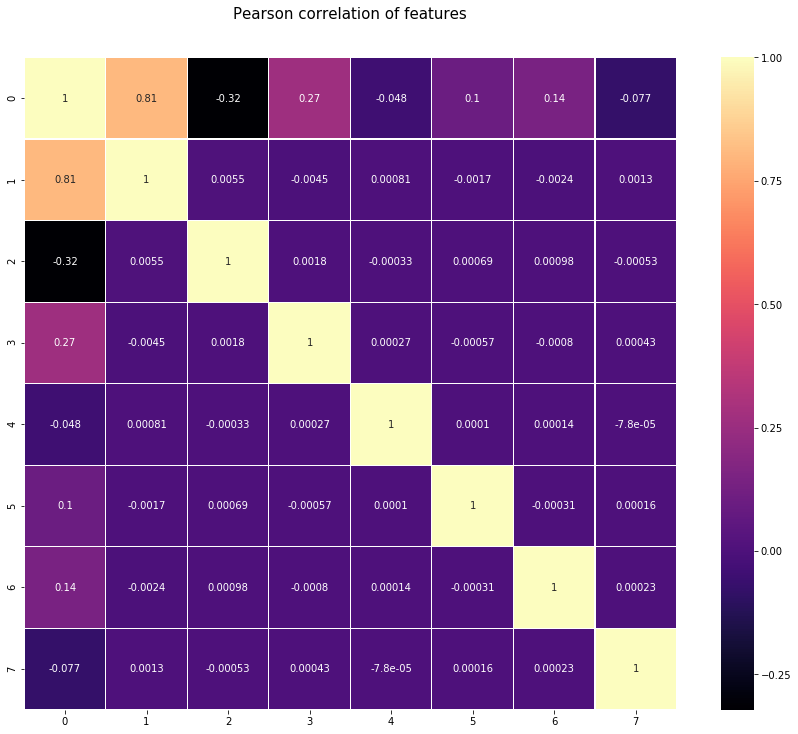

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(pd.DataFrame(X_train).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

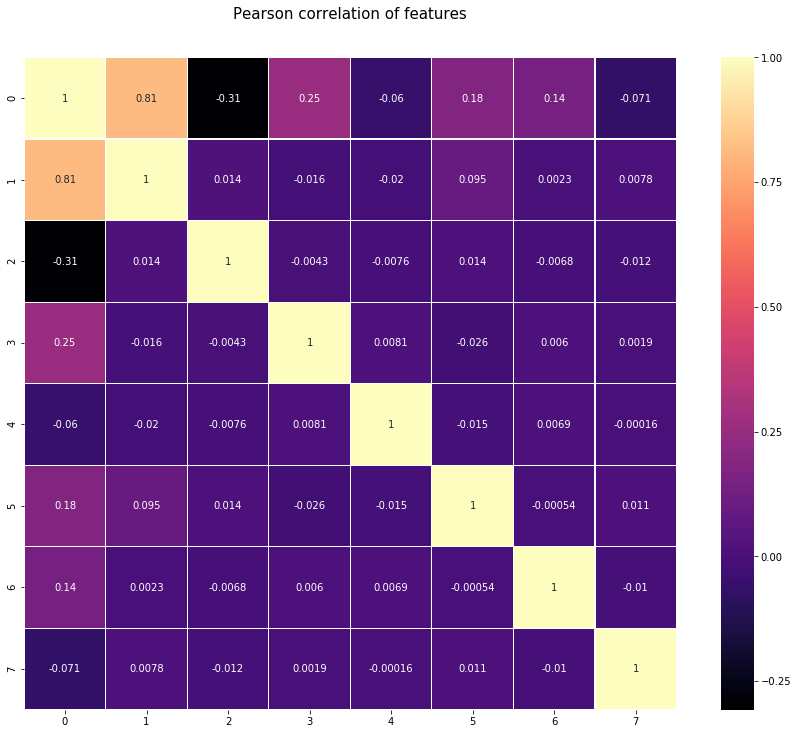

In [15]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(pd.DataFrame(X_test).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

### try features

In [2]:
path = '../../project1/data/'
train_all = pd.read_csv(path+'train_all.csv')
train_combined = pd.read_csv(path+'train_combined.csv')

In [3]:
train_all.head()

,id1,id2,link,rno1,rno2,cn,aai,rai,pa,jaccard_nx,...,common_authors,title_overlap,journal_overlap,journal_sim,abs_tfidf_sim,abs_reduced_tfidf_sim,abs_gensim_sim,abs_gaussian_sim,abs_centroid_sim,abs_wmd
0,9510123,9502114,1,16827,15446,1,0.513898,0.142857,72.0,0.058824,...,0.0,0.285714,1.0,1.0,0.089976,0.242161,0.064373,0.482725,0.716250,2.992504
1,9707075,9604178,1,21154,18059,20,4.320366,0.226401,11613.0,0.097087,...,0.0,0.250000,0.0,-1.0,0.043349,0.116740,0.021211,0.448604,0.657709,2.335481
2,9312155,9506142,0,13074,16171,0,0.000000,0.000000,5.0,0.000000,...,0.0,0.000000,0.0,0.0,0.013141,0.067705,0.017202,0.525918,0.804457,2.870290
3,9911255,302165,0,27486,9702,0,0.000000,0.000000,280.0,0.000000,...,0.0,0.000000,0.0,-1.0,0.014208,0.054771,0.012634,0.562086,0.779212,2.767666
4,9701033,209076,0,19856,8212,0,0.000000,0.000000,168.0,0.000000,...,0.0,0.000000,0.0,-1.0,0.075282,0.220903,0.059588,0.578367,0.800134,2.670690


In [4]:
train_combined.iloc[:,10:].head()

,reduced_tfidf_sim,comm_neighbors,jaccard_coeff,in_diff,tgt_citation,gaussian_sim,labels,same_journal,sim,comm_auth_s,comm_neigh_s,aai_s,title_sim,journal_sim
0,0.242161,1,0.176471,5,8,0.482725,1,1,0.064373,0,1,0.513898,0.365455,1.0
1,0.116740,20,0.106796,113,124,0.448604,1,-1,0.021211,0,20,4.320366,-0.006062,-1.0
2,0.067705,0,0.000000,1,2,0.525918,0,0,0.017202,0,0,0.000000,0.002932,0.0
3,0.054771,0,0.000000,-2,2,0.562086,0,-1,0.012634,0,0,0.000000,-0.009145,-1.0
4,0.220903,0,0.000000,-5,2,0.578367,0,-1,0.059588,0,0,0.000000,-0.000500,-1.0


In [5]:
train_all.columns

Index(['id1', 'id2', 'link', 'rno1', 'rno2', 'cn', 'aai', 'rai', 'pa',
       'jaccard_nx', 'inlink_diff', 'tgt_citation', 'year_diff',
       'common_authors', 'title_overlap', 'journal_overlap', 'journal_sim',
       'abs_tfidf_sim', 'abs_reduced_tfidf_sim', 'abs_gensim_sim',
       'abs_gaussian_sim', 'abs_centroid_sim', 'abs_wmd'],
      dtype='object')

In [6]:
train_combined.columns

Index(['id1', 'id2', 'pref_attach', 'res_allo_ind', 'ada_ada_ind',
       'jaccard_nx', 'overlap_title', 'temp_diff', 'comm_auth',
       'tfidf_cos_sim', 'reduced_tfidf_sim', 'comm_neighbors', 'jaccard_coeff',
       'in_diff', 'tgt_citation', 'gaussian_sim', 'labels', 'same_journal',
       'sim', 'comm_auth_s', 'comm_neigh_s', 'aai_s', 'title_sim',
       'journal_sim'],
      dtype='object')

In [7]:
train_all['title_overlap_o'] = train_combined['overlap_title']
train_all['common_authors_o'] = train_combined['comm_auth']
train_all['title_sim'] = train_combined['title_sim']
train_all.to_csv(path+'train_all2.csv', index=False)

In [8]:
test_all = pd.read_csv(path+'test_all.csv')
test_combined = pd.read_csv(path+'test_combined.csv')
test_all['title_overlap_o'] = test_combined['overlap_title']
test_all['common_authors_o'] = test_combined['comm_auth']
test_all['title_sim'] = test_combined['title_sim']
test_all.to_csv(path+'test_all2.csv', index=False)